In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

In [2]:
#Read larmip data
ds = xr.open_dataset('../data/larmip.nc')


In [4]:
ds2 = xr.open_dataset('../data/eveline/thetao_biasadj_sector_timeseries_historical+ssp126_1850_2100.nc')
ds2 = ds2.sel(year=slice(1951,2100))
evbas = ['eais','ross','amun','wedd','apen']

ds['esm'] = ds2.model.values
ds['time'] = ds2.year.values
ds['ssp'] = ['126','245','585']
ds

<xarray.Dataset>
Dimensions:  (rftime: 150, ism: 9, basin: 5, esm: 16, time: 150, ssp: 3)
Coordinates:
  * rftime   (rftime) int64 0 1 2 3 4 5 6 7 ... 142 143 144 145 146 147 148 149
  * ism      (ism) object 'CISM_NCA' 'FETI_ULB' ... 'PISM_PIK' 'SICO_ILTS'
  * basin    (basin) object 'EAIS' 'ROSS' 'AMUN' 'WEDD' 'PENS'
  * esm      (esm) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM'
  * time     (time) int64 1951 1952 1953 1954 1955 ... 2096 2097 2098 2099 2100
  * ssp      (ssp) <U3 '126' '245' '585'
Data variables:
    irf      (rftime, ism, basin) float64 ...
    srf      (rftime, ism, basin) float64 ...

In [5]:
temp = np.zeros((len(ds.time),len(ds.esm),len(ds.ssp),len(ds.basin)))
for s,ss in enumerate(ds.ssp.values):
    ds2 = xr.open_dataset(f'../data/eveline/thetao_biasadj_sector_timeseries_historical+ssp{ss}_1850_2100.nc')
    ds2 = ds2.sel(year=slice(1951,2100))
    for e,es in enumerate(ds.esm):
        for b,eb in enumerate(evbas):
            temp[:,e,s,b] = ds2[eb][e,:].values

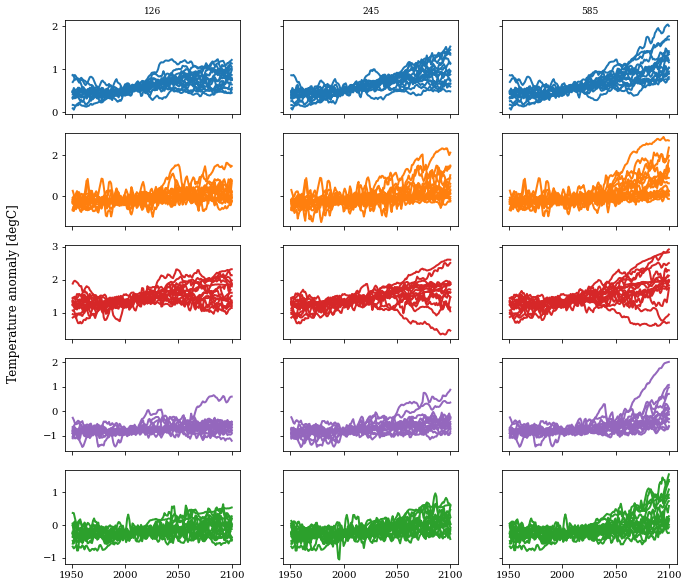

In [6]:
fig,ax = plt.subplots(len(ds.basin),len(ds.ssp),sharex=True,sharey='row',figsize=(10,10))

for s,ss in enumerate(ds.ssp.values):
    ax[0,s].set_title(ss)
    for b,bas in enumerate(ds.basin.values):
        for e,es in enumerate(ds.esm):
            ax[b,s].plot(ds.time,temp[:,e,s,b],c=ut.bcol[bas],label=bas)

fig.supylabel('Temperature anomaly [degC]')
plt.show()

In [7]:
#Save as combined netcdf file

ds['temp'] = xr.DataArray(temp,dims=('time','esm','ssp','basin'),attrs={'unit':'degrees Celcius','long_name':'temperature anomaly from pre-industrial control'})

ds.to_netcdf(f'../data/larmiptemp.nc',mode='w')
ds.close()